<a href="https://colab.research.google.com/github/mehreen89/DataSets/blob/main/mehreen_NLP_LDATopic_Hw4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### "Amazon-Alexa" Topic modeling with Gensim

#### https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

### import the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Gensim

!pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

### Load the input data ( "amazon alexa reviews data")

In [ ]:
# Loading TSV file
df_amazon = pd.read_csv ("/content/amazon_alexa.tsv", sep="\t")

In [ ]:
# Top 5 records
df_amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df_amazon_mod = df_amazon[['verified_reviews','feedback']]
df_amazon_mod.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
nltk.download('stopwords')

# Define the stop words
stop_words = set(stopwords.words('english'))

def clean(string):
    string = str(string)
    cleanString = re.sub('[^A-Za-z]+', ' ', string)
    return cleanString

df_amazon_mod['reviews_non_numeric'] = df_amazon_mod['verified_reviews'].map(clean)
df_amazon_mod['reviews_len_trim'] = df_amazon_mod['reviews_non_numeric'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df_amazon_mod['reviews_Tokenized'] = df_amazon_mod['reviews_len_trim'].map(lambda x: x.lower().split())
df_amazon_mod['reviews_Tokenized_stop'] = df_amazon_mod['reviews_Tokenized'].map(lambda x: " ".join(x for x in x if x not in stop_words))
df_amazon_mod['reviews_Tokenized_stop'] = df_amazon_mod['reviews_Tokenized_stop'].map(lambda x: x.split())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-143-04192bceb33e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_mod['reviews_non_numeric'] = df_amazon_mod['verified_reviews'].map(clean)
<ipython-input-143-04192bceb33e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_mod['reviews_len_trim'] = df_amazon_mod['reviews_non_numeric'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))


In [ ]:
df_amazon_mod.head()

,verified_reviews,feedback,reviews_non_numeric,reviews_len_trim,reviews_Tokenized,reviews_Tokenized_stop
0,Love my Echo!,1,Love my Echo,Love Echo,"[love, echo]","[love, echo]"
1,Loved it!,1,Loved it,Loved,[loved],[loved]
2,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...,Sometimes while playing game you can answer qu...,"[sometimes, while, playing, game, you, can, an...","[sometimes, playing, game, answer, question, c..."
3,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My yr ...,have had lot fun with this thing old learns ab...,"[have, had, lot, fun, with, this, thing, old, ...","[lot, fun, thing, old, learns, dinosaurs, cont..."
4,Music,1,Music,Music,[music],[music]


In [ ]:
df_amazon_mod['reviews_Tokenized_stop'][0:3]

0                                         [love, echo]
1                                              [loved]
2    [sometimes, playing, game, answer, question, c...
Name: reviews_Tokenized_stop, dtype: object

In [ ]:
# Create a corpus from a list of texts

texts = df_amazon_mod['reviews_Tokenized_stop']

# 1. Create Dictionary ( constructs word -> id mapping )
id2word = corpora.Dictionary(df_amazon_mod['reviews_Tokenized_stop'])

# Term Document Frequency ( convert document into the bag of words )
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [ ]:
id2word[0]

'echo'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('echo', 1), ('love', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, # bow representation of docs
                                           id2word=id2word, # dictionary ( word -> id mapping )
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1, # number of docs to be iterated through for each update
                                           chunksize=100, # number of documents to be used in each training chunk
                                           passes=10, # number of passes through the corpus during training
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
print(*lda_model.print_topics(), sep='\n\n')
doc_lda = lda_model[corpus]

(0, '0.056*"house" + 0.048*"work" + 0.039*"questions" + 0.032*"connected" + 0.024*"volume" + 0.023*"wanted" + 0.020*"computer" + 0.020*"convenient" + 0.019*"working" + 0.019*"trying"')

(1, '0.172*"great" + 0.099*"works" + 0.066*"good" + 0.063*"product" + 0.051*"speaker" + 0.025*"sound" + 0.023*"another" + 0.020*"wish" + 0.018*"kids" + 0.018*"perfect"')

(2, '0.159*"echo" + 0.102*"dot" + 0.047*"better" + 0.046*"sound" + 0.041*"quality" + 0.025*"purchase" + 0.021*"phone" + 0.019*"speaker" + 0.015*"size" + 0.014*"dots"')

(3, '0.053*"music" + 0.050*"alexa" + 0.042*"like" + 0.027*"one" + 0.026*"play" + 0.021*"home" + 0.018*"time" + 0.018*"get" + 0.017*"amazon" + 0.017*"smart"')

(4, '0.040*"fine" + 0.035*"light" + 0.028*"loved" + 0.025*"additional" + 0.024*"bulbs" + 0.023*"disappointed" + 0.020*"hooked" + 0.018*"next" + 0.016*"thermostat" + 0.016*"error"')

(5, '0.185*"love" + 0.102*"use" + 0.044*"still" + 0.027*"got" + 0.026*"everything" + 0.026*"much" + 0.025*"fun" + 0.023*"far" + 0.023

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_amazon_mod['reviews_Tokenized_stop'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.546279505100364

Coherence Score:  0.43346069035334167


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.375376  0.051501       1        1  33.094992
5     -0.119892  0.225352       2        1  14.030265
2     -0.031881 -0.234458       3        1  10.781736
1     -0.054440 -0.285630       4        1  10.109436
6      0.100199  0.063129       5        1   8.048946
7      0.084921  0.056381       6        1   7.219919
0      0.106154  0.018495       7        1   5.956638
4      0.099972  0.037370       8        1   4.310876
8      0.101146  0.038498       9        1   4.275378
9      0.089198  0.029362      10        1   2.171813, topic_info=             Term         Freq        Total Category  logprob  loglift
1            love  1003.000000  1003.000000  Default  30.0000  30.0000
57          great   672.000000   672.000000  Default  29.0000  29.0000
0            echo   665.000000   665.000000  Default  28.0000  28.0000
71            use   552.000000   552.000000  Default  27.0000  27.0000
102          easy   384.000000   384.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
630         spend     6.587304     7.522365  Topic10  -4.8473   3.6969
3055    discovery     5.864005     6.800414  Topic10  -4.9636   3.6815
914   electronics     5.558230     6.493607  Topic10  -5.0171   3.6741
2165       manage     5.221509     6.157184  Topic10  -5.0796   3.6648
1429          ran     5.165317     6.104616  Topic10  -5.0904   3.6625

[355 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
813       8  0.972723     ability
3         1  0.100452        able
3         2  0.885805        able
856       2  0.961548  absolutely
521       2  0.968025      access
...     ...       ...         ...
770       6  0.975446       worth
326       1  0.997856       would
101       9  0.979838        year
73        5  0.030119         yet
73        6  0.933688         yet

[342 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 3, 2, 7, 8, 1, 5, 9, 10])

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
nltk.download('stopwords')

# Define the stop words
stop_words = set(stopwords.words('english'))

def clean(string):
    string = str(string)
    cleanString = re.sub('[^A-Za-z]+', ' ', string)
    return cleanString

df_amazon_mod['reviews_non_numeric'] = df_amazon_mod['verified_reviews'].map(clean)
df_amazon_mod['reviews_len_trim'] = df_amazon_mod['reviews_non_numeric'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df_amazon_mod['reviews_Tokenized'] = df_amazon_mod['reviews_len_trim'].map(lambda x: x.lower().split())
df_amazon_mod['reviews_Tokenized_stop'] = df_amazon_mod['reviews_Tokenized'].map(lambda x: " ".join(x for x in x if x not in stop_words))
df_amazon_mod['reviews_Tokenized_stop'] = df_amazon_mod['reviews_Tokenized_stop'].map(lambda x: x.split())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### LDA Mallet Model

In [ ]:
import gensim
from gensim.models import LdaModel
from gensim import corpora

# Assuming you have already created 'corpus' and 'id2word' variables

num_topics = 20
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)



In [ ]:
# Show Topics
topics = lda_model.show_topics(formatted=False)
for topic in topics:
    print(topic)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_amazon_mod['reviews_Tokenized_stop'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)


(12, [('love', 0.028227901), ('convenient', 0.022450289), ('nothing', 0.012677194), ('daily', 0.012379139), ('daughter', 0.01212525), ('life', 0.011575363), ('entertainment', 0.011395337), ('friendly', 0.0111463955), ('user', 0.010966694), ('news', 0.010714998)])
(11, [('alexa', 0.03611067), ('love', 0.027832061), ('music', 0.017827122), ('firestick', 0.016462684), ('play', 0.014341983), ('echo', 0.013456904), ('like', 0.010196947), ('good', 0.009886924), ('use', 0.009601351), ('smart', 0.009319253)])
(16, [('echo', 0.023212219), ('love', 0.020215625), ('great', 0.019000042), ('alexa', 0.01847025), ('easy', 0.015118683), ('cable', 0.01193684), ('set', 0.011703427), ('many', 0.011056361), ('hook', 0.010668086), ('like', 0.009924791)])
(15, [('like', 0.03568727), ('use', 0.032137163), ('echo', 0.02746768), ('easy', 0.020990832), ('music', 0.019466108), ('set', 0.017358413), ('love', 0.015211164), ('play', 0.01507389), ('alexa', 0.013372776), ('device', 0.013195742)])
(14, [('music', 0.02

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Create LDA model
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)

        # Compute coherence value
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Call the compute_coherence_values function
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df_amazon_mod['reviews_Tokenized_stop'], start=2, limit=40, step=6)


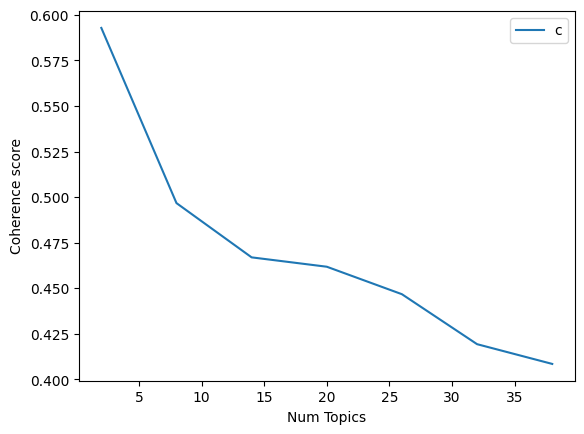

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5929
Num Topics = 8  has Coherence Value of 0.4968
Num Topics = 14  has Coherence Value of 0.467
Num Topics = 20  has Coherence Value of 0.4619
Num Topics = 26  has Coherence Value of 0.4468
Num Topics = 32  has Coherence Value of 0.4194
Num Topics = 38  has Coherence Value of 0.4085


In [ ]:
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
print(*optimal_model.print_topics(num_words=10),sep='\n\n\n')



(0, '0.025*"love" + 0.018*"use" + 0.016*"alexa" + 0.016*"easy" + 0.015*"music" + 0.015*"like" + 0.015*"echo" + 0.012*"set" + 0.009*"great" + 0.009*"dot"')


(1, '0.025*"great" + 0.022*"love" + 0.020*"echo" + 0.016*"works" + 0.012*"alexa" + 0.011*"music" + 0.010*"like" + 0.009*"product" + 0.008*"sound" + 0.008*"one"')


### Finding the dominant topic in each sentence
### Finding the most representative document for each topic
### Topic distributions across documents

### Topic Modeling - LSA model

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(df_amazon_mod['reviews_Tokenized_stop'])

# Create Corpus
texts = df_amazon_mod['reviews_Tokenized_stop']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [ ]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

# find the coherence score with a different number of topics
for i in range(2,11):
    lsi = LsiModel(corpus, num_topics=i, id2word=id2word)
    coherence_model = CoherenceModel(model=lsi, texts=df_amazon_mod['reviews_Tokenized_stop'], dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))

Coherence score with 2 clusters: 0.6023518168264237
Coherence score with 3 clusters: 0.6482210681888715
Coherence score with 4 clusters: 0.5354078427603695
Coherence score with 5 clusters: 0.6038810536617147
Coherence score with 6 clusters: 0.6024505564882646
Coherence score with 7 clusters: 0.5811961443450462
Coherence score with 8 clusters: 0.6375900653779134
Coherence score with 9 clusters: 0.5806713453317339
Coherence score with 10 clusters: 0.6406752691752231


In [ ]:
### The coherence score is highest with 10 topics

In [ ]:
# perform SVD on the bag of words with the LsiModel to extract 2 topics
lsi = LsiModel(corpus, num_topics=2, id2word=id2word)

In [ ]:
# find the 5 words with the srongest association to the derived topics
for topic_num, words in lsi.print_topics(num_words=5):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.474*"echo" + 0.313*"alexa" + 0.265*"love" + 0.214*"music" + 0.202*"great".
Words in 1: -0.676*"echo" + 0.332*"alexa" + 0.323*"love" + 0.218*"music" + -0.174*"hub".
